In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Creating subplots with col and row
We've seen in prior exercises that students with more absences ("absences") tend to have lower final grades ("G3"). Does this relationship hold regardless of how much time students study each week?

To answer this, we'll look at the relationship between the number of absences that a student has in school and their final grade in the course, creating separate subplots based on each student's weekly study time ("study_time").

In [3]:
csv_filepath  = r".\datasets\student-alcohol-consumption.csv"

student_data = pd.read_csv(csv_filepath,index_col=0)

student_data.head()

,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,schoolsup,...,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
0,GP,F,18,GT3,A,4,4,2,0,yes,...,4,1,1,3,6,5,6,6,Urban,2 to 5 hours
1,GP,F,17,GT3,T,1,1,1,0,no,...,3,1,1,3,4,5,5,6,Urban,2 to 5 hours
2,GP,F,15,LE3,T,1,1,1,3,yes,...,2,2,3,3,10,7,8,10,Urban,2 to 5 hours
3,GP,F,15,GT3,T,4,2,1,0,no,...,2,1,1,5,2,15,14,15,Urban,5 to 10 hours
4,GP,F,16,GT3,T,3,3,1,0,no,...,2,1,2,5,4,6,10,10,Urban,2 to 5 hours


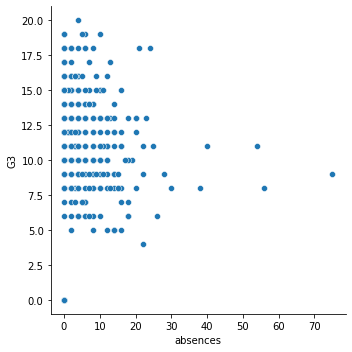

In [4]:
# Change to use relplot() instead of scatterplot()
sns.relplot(x="absences", y="G3",
                data=student_data,
                kind='scatter')

# Show plot
plt.show()

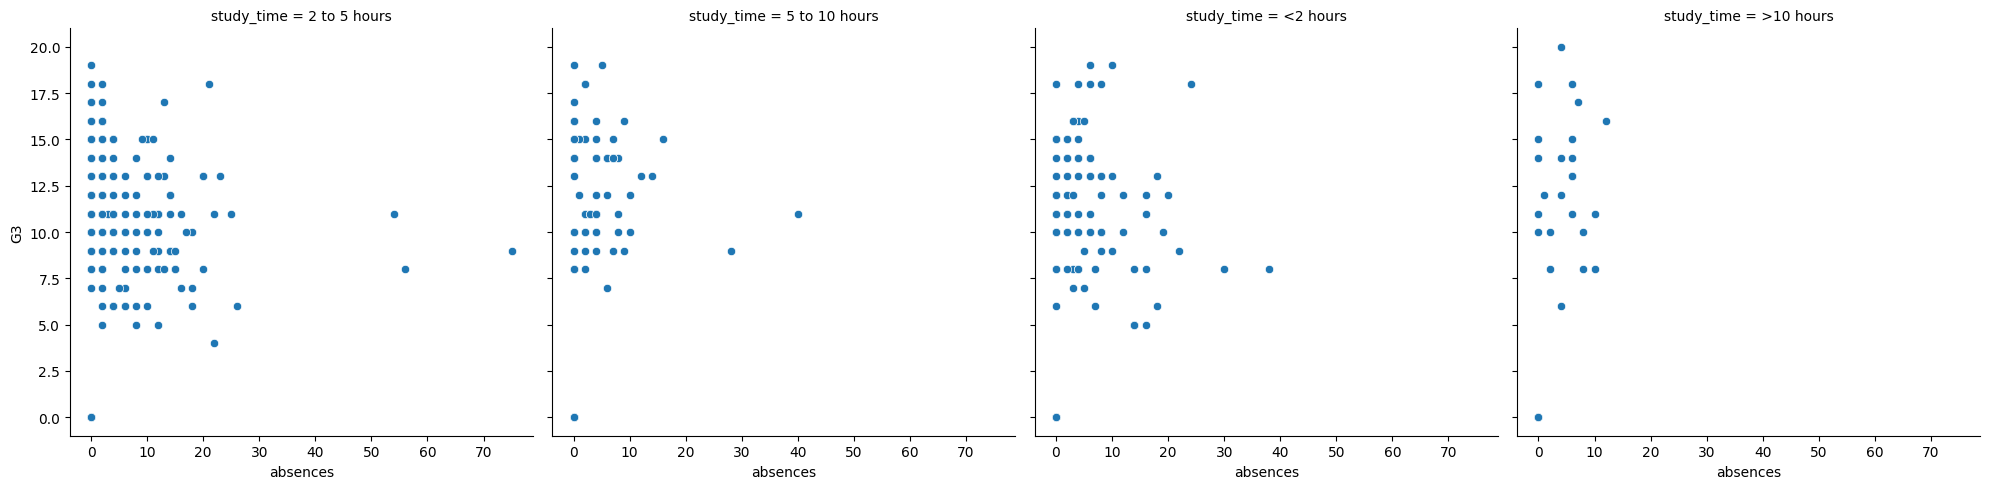

In [5]:
# Change to make subplots based on study time
sns.relplot(x="absences", y="G3",
            data=student_data,
            kind="scatter",
            col='study_time')

# Show plot
plt.show()

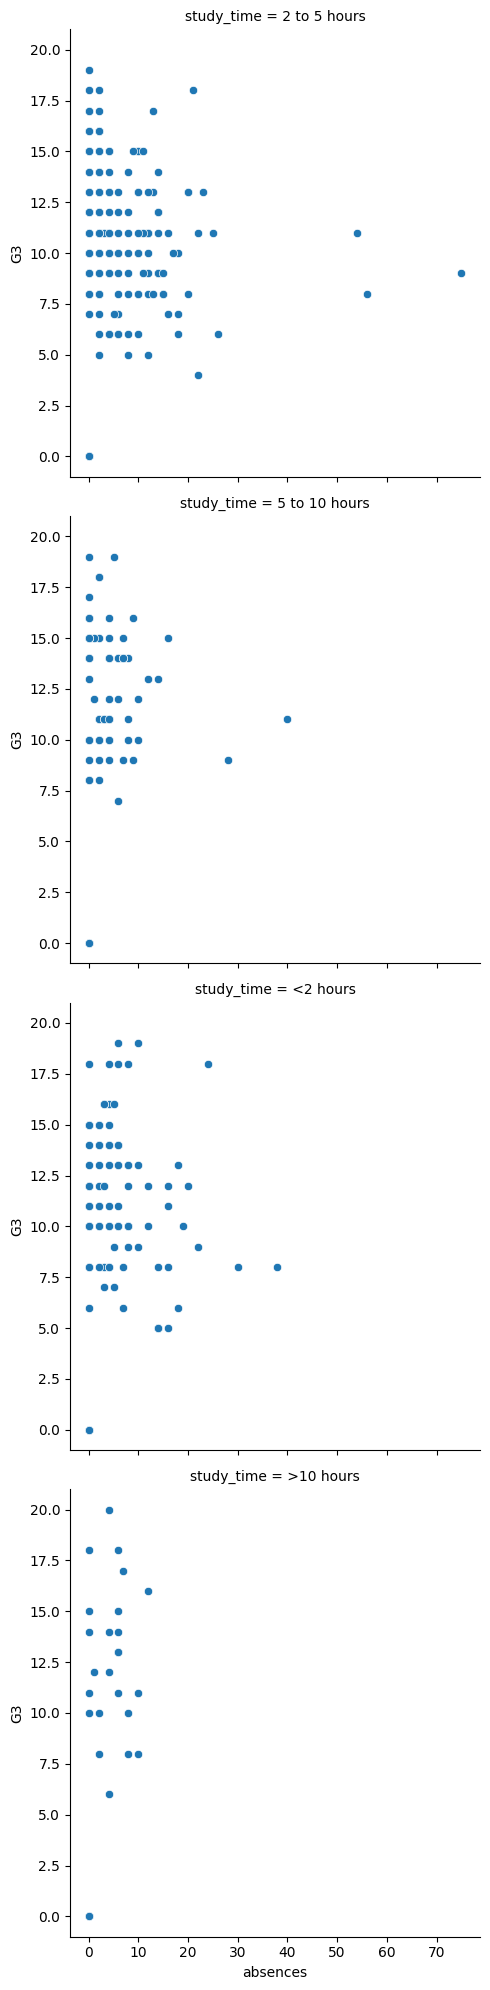

In [6]:
# Change this scatter plot to arrange the plots in rows instead of columns
sns.relplot(x="absences", y="G3",
            data=student_data,
            kind="scatter",
            row="study_time")

# Show plot
plt.show()

### Creating two-factor subplots
Let's continue looking at the student_data dataset of students in secondary school. Here, we want to answer the following question: does a student's first semester grade ("G1") tend to correlate with their final grade ("G3")?

There are many aspects of a student's life that could result in a higher or lower final grade in the class. For example, some students receive extra educational support from their school ("schoolsup") or from their family ("famsup"), which could result in higher grades. Let's try to control for these two factors by creating subplots based on whether the student received extra educational support from their school or family.

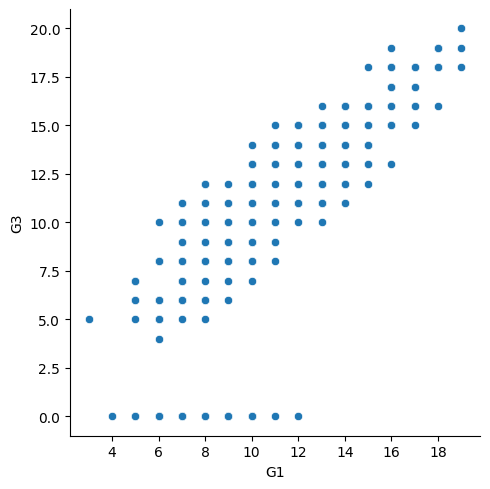

In [7]:
# Create a scatter plot of G1 vs. G3
sns.relplot(x='G1', y='G3',
            data=student_data,
            kind='scatter')
# Show plot
plt.show()

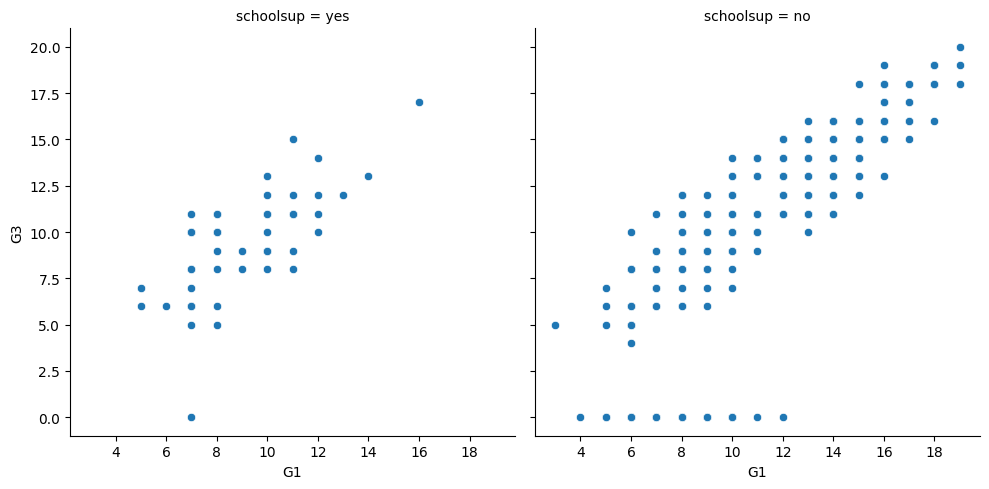

In [9]:
# Adjust to add subplots based on school support
# Create column subplots based on whether the student received support from the school ("schoolsup"), ordered so that "yes" comes before "no"
sns.relplot(x="G1", y="G3", 
            data=student_data,
            kind="scatter",
            col='schoolsup',
            col_order=['yes','no'])

# Show plot
plt.show()

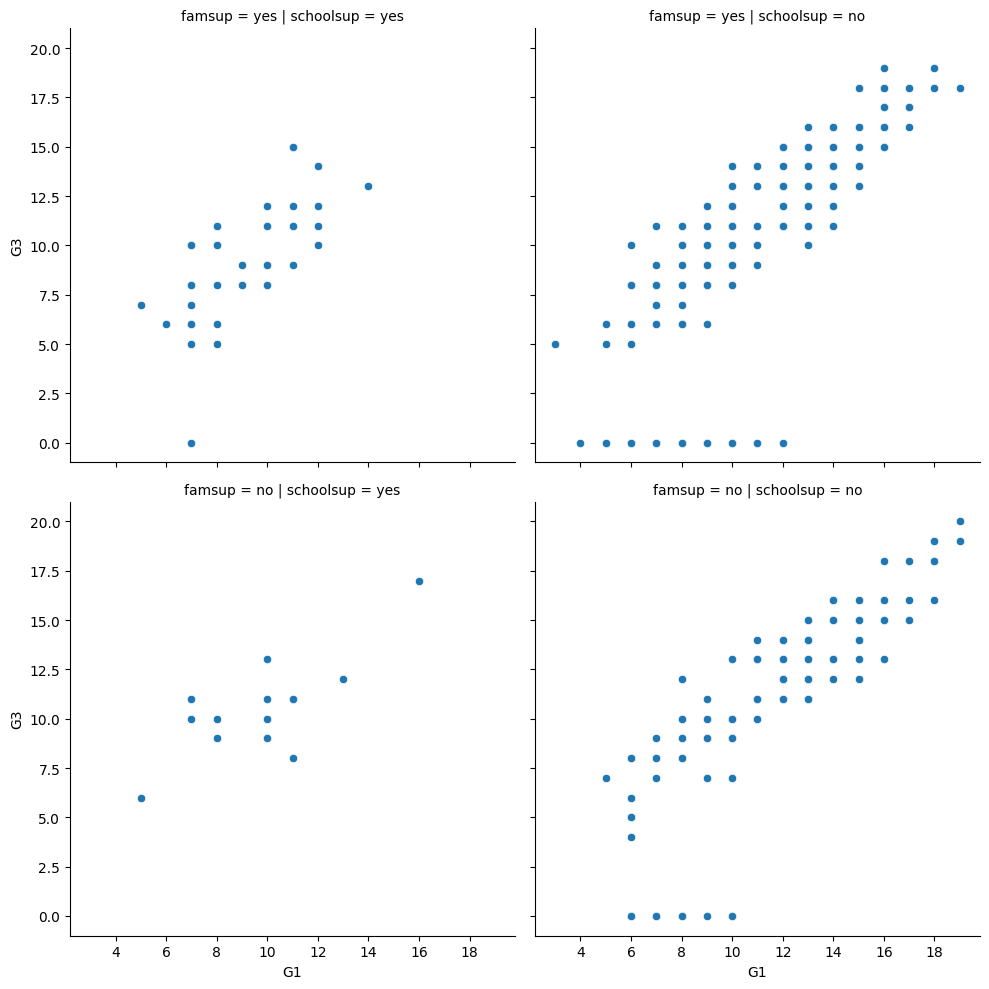

In [12]:
# Add row subplots based on whether the student received support from the family ("famsup"), ordered so that "yes" comes before "no". This will result in subplots based on two factors.
# Adjust further to add subplots based on family support
sns.relplot(x="G1", y="G3",
            data=student_data,
            kind="scatter",
            col="schoolsup",
            col_order=["yes", "no"],
            row='famsup',
            row_order=["yes", "no"])

# Show plot
plt.show()

### Changing the size of scatter plot points
In this exercise, we'll explore Seaborn's mpg dataset, which contains one row per car model and includes information such as the year the car was made, the number of miles per gallon ("M.P.G.") it achieves, the power of its engine (measured in "horsepower"), and its country of origin.

What is the relationship between the power of a car's engine ("horsepower") and its fuel efficiency ("mpg")? And how does this relationship vary by the number of cylinders ("cylinders") the car has? Let's find out.

In [16]:
#sns.get_dataset_names()
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


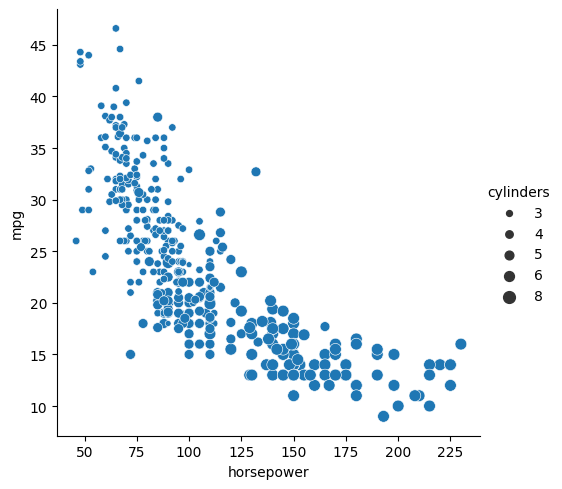

In [17]:
# Use relplot() and the mpg DataFrame to create a scatter plot with "horsepower" on the x-axis and "mpg" on the y-axis. Vary the size of the points by the number of cylinders in the car ("cylinders").
# Create scatter plot of horsepower vs. mpg
sns.relplot(data=mpg,
            x = 'horsepower',
            y= 'mpg',
            kind='scatter',
            size='cylinders')

# Show plot
plt.show()

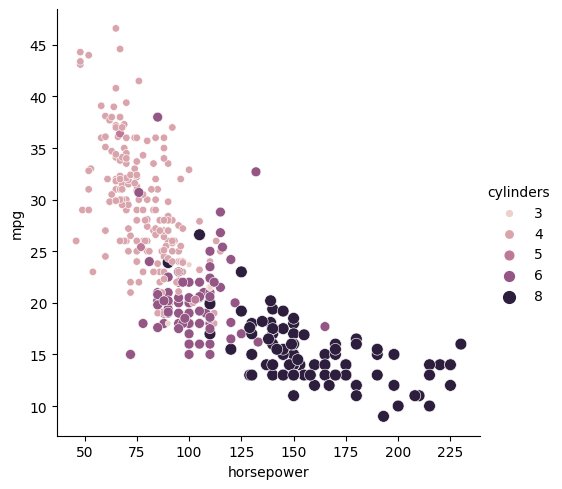

In [18]:
#To make this plot easier to read, use hue to vary the color of the points by the number of cylinders in the car ("cylinders").
sns.relplot(data=mpg,
            x = 'horsepower',
            y= 'mpg',
            kind='scatter',
            size='cylinders',
            hue='cylinders')

# Show plot
plt.show()

### Changing the style of scatter plot points
Let's continue exploring Seaborn's mpg dataset by looking at the relationship between how fast a car can accelerate ("acceleration") and its fuel efficiency ("mpg"). Do these properties vary by country of origin ("origin")?

Note that the "acceleration" variable is the time to accelerate from 0 to 60 miles per hour, in seconds. Higher values indicate slower acceleration.

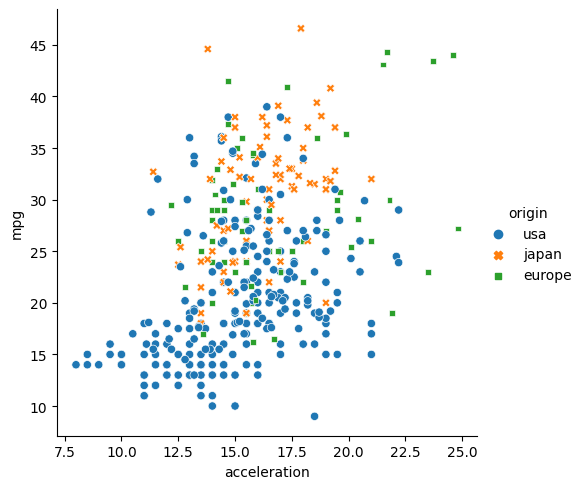

In [21]:
# Use relplot() and the mpg DataFrame to create a scatter plot with "acceleration" on the x-axis and "mpg" on the y-axis. Vary the style and color of the plot points by country of origin ("origin").

# Create a scatter plot of acceleration vs. mpg
sns.relplot(data=mpg,
            x = 'acceleration',
            y = 'mpg',
            style = 'origin',
            kind='scatter',
            hue = 'origin')
# Show plot
plt.show()

### Interpreting line plots
In this exercise, we'll continue to explore Seaborn's mpg dataset, which contains one row per car model and includes information such as the year the car was made, its fuel efficiency (measured in "miles per gallon" or "M.P.G"), and its country of origin (USA, Europe, or Japan).

How has the average miles per gallon achieved by these cars changed over time? Let's use line plots to find out!

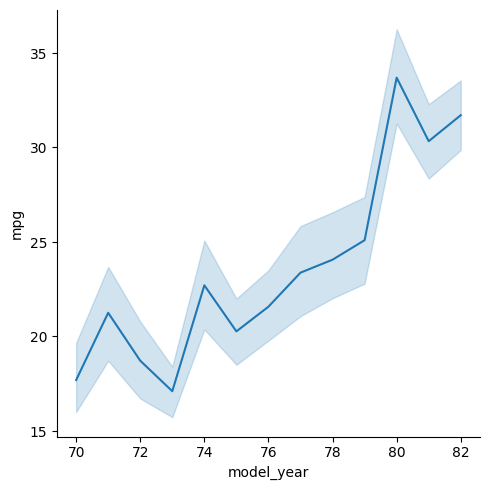

In [23]:
# Use relplot() and the mpg DataFrame to create a line plot with "model_year" on the x-axis and "mpg" on the y-axis.

sns.relplot(data = mpg,
            x = 'model_year',
            y = 'mpg',
            kind = 'line')
plt.show()

### Visualizing standard deviation with line plots
In the last exercise, we looked at how the average miles per gallon achieved by cars has changed over time. Now let's use a line plot to visualize how the distribution of miles per gallon has changed over time.

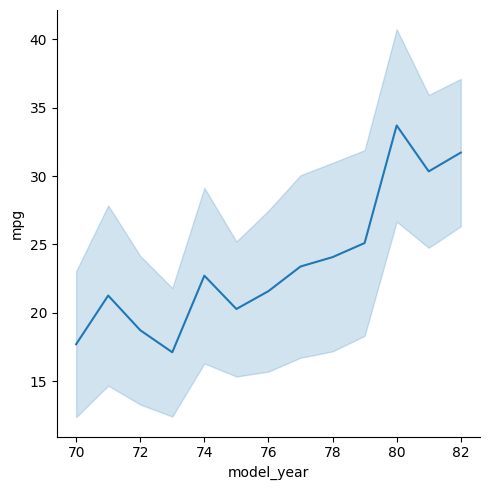

In [24]:
# Change the plot so the shaded area shows the standard deviation instead of the confidence interval for the mean.
# Make the shaded area show the standard deviation
sns.relplot(x="model_year", y="mpg",
            data=mpg, kind="line",
            ci='sd')

# Show plot
plt.show()

### Plotting subgroups in line plots
Let's continue to look at the mpg dataset. We've seen that the average miles per gallon for cars has increased over time, but how has the average horsepower for cars changed over time? And does this trend differ by country of origin?

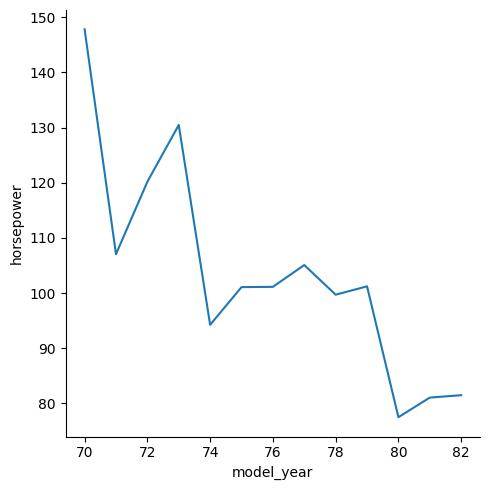

In [26]:
# Use relplot() and the mpg DataFrame to create a line plot with "model_year" on the x-axis and "horsepower" on the y-axis. Turn off the confidence intervals on the plot.
# Create line plot of model year vs. horsepower
sns.relplot(data=mpg,
            x = "model_year",
            y = "horsepower",
            ci = None,
            kind='line')



# Show plot
plt.show()

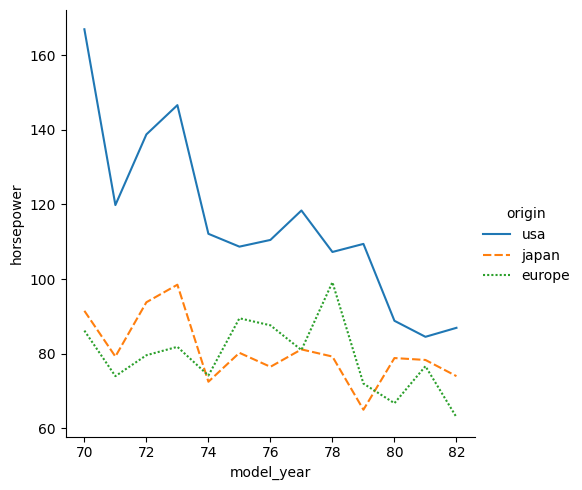

In [27]:
#Create different lines for each country of origin ("origin") that vary in both line style and color.
# Change to create subgroups for country of origin
sns.relplot(x="model_year", y="horsepower",
            data=mpg, kind="line",
            ci=None,
            hue='origin',
            style='origin')

# Show plot
plt.show()

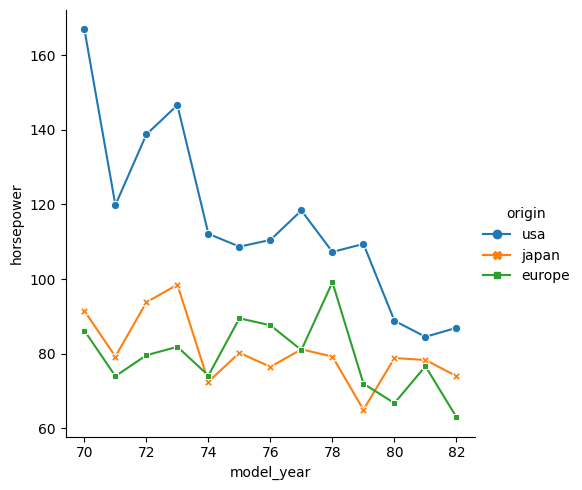

In [32]:
#Add markers for each data point to the lines.
#Use the dashes parameter to use solid lines for all countries, while still allowing for different marker styles for each line.

sns.relplot(x="model_year", y="horsepower",
            data=mpg, kind="line",
            ci=None,
            hue='origin',
            style='origin',
            markers=True,
            dashes=False)

# Show plot
plt.show()